# Progetto DATA & WEB MINING 2021/2022

## Zillow Prize Data set

### Importiamo tutte le librerie utili per lo studio: 

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
plt.style.use("seaborn")

### Carichiamo i dati all'interno di due varibili:

In [27]:
prop_data = pd.read_csv("properties_2016.csv")
train_data = pd.read_csv("train_2016_v2.csv")

d:\Programmi\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Processiamo i dati

Effettuiamo il merge delle properties e del train che ci è stato forinito per ottenere il trining dataset completo

In [28]:
#usa per resettare il df
df_train = pd.merge(train_data,prop_data, how="left", on="parcelid")

df_train

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13


facciamo un check delle feature che abbiamo e dei rispettivi valori che gli sono associati 

In [29]:
#print(df_train.iloc[:,50:58])
df_train = df_train.drop(['propertyzoningdesc', 'propertycountylandusecode','taxdelinquencyflag'], axis=1)
num_inst, num_features = df_train.shape

print(df_train.columns)

for f in range(num_features):
    print (df_train.columns[f], np.unique(df_train.iloc[:,f]))

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt

Controlliamo la distribuzione del logerror, così da avere un idea dell'andamento dei dati e poter individuare eventuali outliers da rimuovere subito

d:\Programmi\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


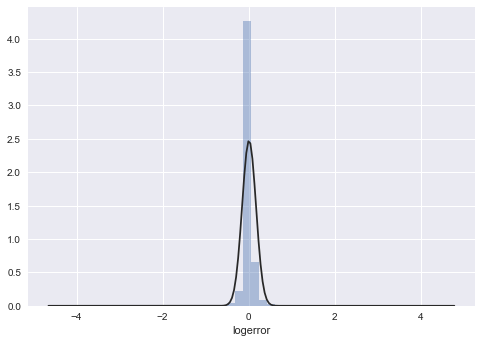

In [30]:
y = df_train["logerror"]

# istogramma del logerror 
mu, std = norm.fit(y) 
  
# Plot the histogram.
sns.distplot(y, fit=norm, kde=False)
plt.show()

# 

Feature nuove per gestire la data di vendita

In [31]:
# metodo con mese acquisto e tempo da età ad acquisto
def add_new_buyed_eta_features(df):
    df['transactiondate'] = pd.to_datetime(df.transactiondate, format='%Y-%m-%d')
    df['month_buyed'] = df['transactiondate'].dt.month
    df['day_buyed'] = df['transactiondate'].dt.day
    df['eta'] = (df['transactiondate'].dt.month +  ((df['transactiondate'].dt.year - df['yearbuilt'] ) * 12))
    df = df.drop(['transactiondate'], axis = 1)
    return df

df_train = add_new_buyed_eta_features(df_train)

df_train

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,month_buyed,day_buyed,eta
0,11016594,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,6.037107e+13,1,1,685.0
1,14366692,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,1,1,25.0
2,12098116,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,...,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,6.037464e+13,1,1,913.0
3,12643413,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,6.037296e+13,1,2,349.0
4,14432541,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,6.059042e+13,1,2,421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,1.0,NaN,NaN,1.0,1.0,NaN,4.0,1.0,...,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,6.037132e+13,12,30,456.0
90271,12046695,0.0070,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,6.037301e+13,12,30,624.0
90272,12995401,-0.2679,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,...,22008.0,38096.0,2015.0,16088.0,1925.70,14.0,6.037433e+13,12,30,1116.0
90273,11402105,0.0602,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,6.037601e+13,12,30,432.0


Effettuiamo una divisione in cluster in base alle variabili di posizionamento geografico in possesso 

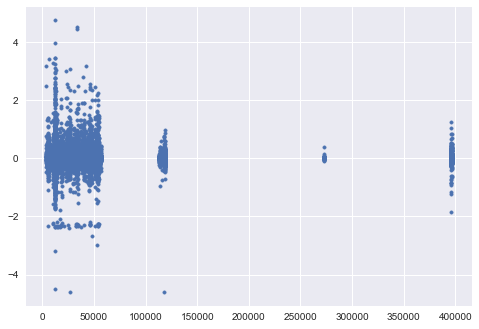

In [32]:
plt.scatter(df_train.regionidcity, df_train.logerror , marker = '.');
plt.show()

         longitude    latitude  regionidcity  regionidcounty  regionidzip
0     -118488536.0  34280990.0       12447.0          3101.0      96370.0
1     -117677556.0  33668120.0       32380.0          1286.0      96962.0
2     -118175032.0  34136312.0       47019.0          3101.0      96293.0
3     -118309000.0  33755800.0       12447.0          3101.0      96222.0
4     -117700234.0  33485643.0       17686.0          1286.0      96961.0
...            ...         ...           ...             ...          ...
90270 -118562000.0  34203000.0       12447.0          3101.0      96364.0
90271 -118224849.0  34198744.0       45457.0          3101.0      96327.0
90272 -118025537.0  34075655.0       51861.0          3101.0      96478.0
90273 -118367000.0  33963900.0       45888.0          3101.0      96133.0
90274 -118219093.0  33838933.0       25218.0          3101.0      96244.0

[90275 rows x 5 columns]
[1 7 9 ... 4 8 2]
<class 'numpy.ndarray'>


d:\Programmi\anaconda\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


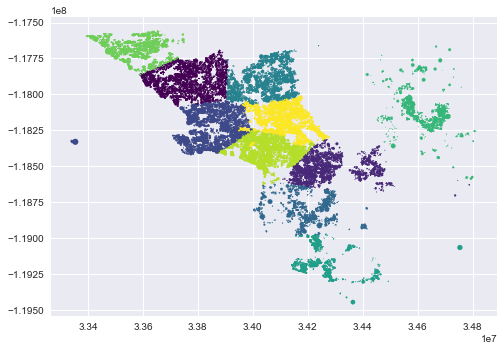

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_pos = df_train[['longitude', 'latitude', 'regionidcity',
       'regionidcounty', 'regionidzip']]

df_pos = df_pos.fillna(df_pos.median())
print(df_pos)

KM = KMeans(n_clusters=10).fit(df_pos)
labels = KM.labels_
print(labels)
print(type(labels))

# plot della suddivisione in cluster in base alla latitudine e longitudine
plt.scatter(df_pos.latitude , df_pos.longitude, s=df_train.logerror * 10, marker = 'o', c = labels,  cmap='viridis');
plt.show()

#aggiungiamo nuova feature al dataset
df_train['location'] = labels.tolist()


d:\Programmi\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


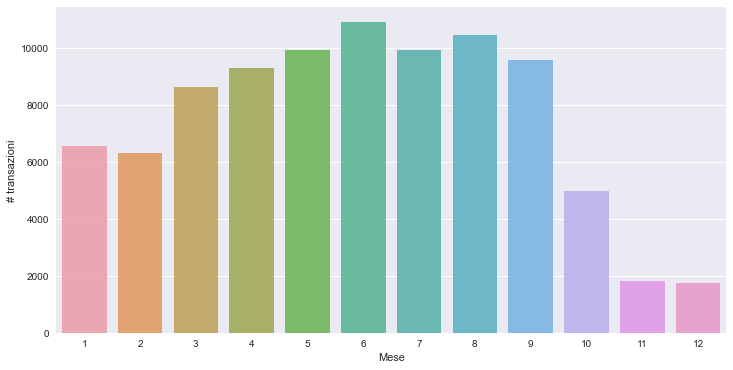

In [34]:
def plot_transaction_months(df):
    index_months = df['month_buyed'].value_counts().index
    unique_months = df['month_buyed'].value_counts().values

    plt.figure(figsize=(12, 6))
    sns.barplot(index_months, unique_months, alpha=0.8)
    plt.xlabel('Mese')
    plt.ylabel('# transazioni')
    plt.show()
    
plot_transaction_months(df_train)

Era stata provata l'aggiunta di una nuova feature che contava la presenza dello stesso "parcelid" nel dataset, tuttavia risultava poco importante, allora abbiamo deciso di rimuovere tutti i "parcelid" duplicati, lasciando quelli con nuova la feature "eta" più bassa, ossia solo le vendite più recenti dello stesso immobile. 

In [35]:
#conta quante volte compare uno stesso parcelid
for id,count in df_train['parcelid'].value_counts().iteritems():
    if count > 1 :
        print('L\'id : ' + str(id) +' compare '+ str(count) +' volte.' )

df_train = df_train.sort_values("eta").drop_duplicates("parcelid",keep="last")

print("Id duplicati : " + str(df_train["parcelid"].duplicated().sum()))
df_train.loc[df_train['parcelid'].isin([11842707])]


L'id : 11842707 compare 3 volte.
L'id : 11633771 compare 2 volte.
L'id : 11742566 compare 2 volte.
L'id : 14322378 compare 2 volte.
L'id : 12097956 compare 2 volte.
L'id : 11554091 compare 2 volte.
L'id : 13037293 compare 2 volte.
L'id : 12448490 compare 2 volte.
L'id : 11735136 compare 2 volte.
L'id : 10961914 compare 2 volte.
L'id : 11188497 compare 2 volte.
L'id : 11913710 compare 2 volte.
L'id : 12715657 compare 2 volte.
L'id : 13850164 compare 2 volte.
L'id : 12678472 compare 2 volte.
L'id : 11866315 compare 2 volte.
L'id : 14667297 compare 2 volte.
L'id : 14607531 compare 2 volte.
L'id : 14621246 compare 2 volte.
L'id : 11477350 compare 2 volte.
L'id : 17151530 compare 2 volte.
L'id : 14500952 compare 2 volte.
L'id : 11729067 compare 2 volte.
L'id : 11822007 compare 2 volte.
L'id : 12457291 compare 2 volte.
L'id : 14753974 compare 2 volte.
L'id : 10796614 compare 2 volte.
L'id : 10815854 compare 2 volte.
L'id : 11561632 compare 2 volte.
L'id : 11121105 compare 2 volte.
L'id : 118

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,month_buyed,day_buyed,eta,location
55796,11842707,0.2078,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,614764.0,2015.0,604519.0,17087.75,NaN,6.037482e+13,9,29,1137.0,9


In [36]:
df_train.to_csv('prova.csv')

In [37]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% dei Valori Totali'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% dei Valori Totali', ascending=False).round(1)
        print ("Il tuo dataframe ha " + str(df.shape[1]) + " colonne.\n"      
            "Ci sono " + str(mis_val_table_ren_columns.shape[0]) +
              " colonne con dei missing values.")
        return mis_val_table_ren_columns
    
print(missing_values_table(df_train))

Il tuo dataframe ha 60 colonne.
Ci sono 45 colonne con dei missing values.
                              Missing Values  % dei Valori Totali
buildingclasstypeid                    90134                100.0
finishedsquarefeet13                   90117                100.0
basementsqft                           90107                100.0
storytypeid                            90107                100.0
yardbuildingsqft26                     90055                 99.9
fireplaceflag                          89930                 99.8
architecturalstyletypeid               89890                 99.7
typeconstructiontypeid                 89852                 99.7
finishedsquarefeet6                    89731                 99.5
decktypeid                             89492                 99.3
poolsizesum                            89184                 98.9
pooltypeid10                           88991                 98.7
pooltypeid2                            88946                 98.7
t

Rimuoviamo le feature che presentano troppi missing value e andiamo a testare invece l'importanza riempiendo temporaneamente con la media le numerical feature e con la mediana le categorical, così da avere un idea di cosa può essere utile da gestire con cura e cosa invece possiamo rimuovere 

In [38]:
#droppiamo le feature con troppi missing, alcune le teniamo per dopo
df_train = df_train.drop(['buildingclasstypeid','finishedsquarefeet13','basementsqft','storytypeid',
                          'yardbuildingsqft26','fireplaceflag','architecturalstyletypeid','typeconstructiontypeid',
                          'finishedsquarefeet6'],axis=1)

In [39]:
#nuova feature presenza sistema riscaldamento e raffreddamento
df_train['airandheating_sis'] = ((df_train['airconditioningtypeid'] > 0) & 
                                (df_train['heatingorsystemtypeid'] > 0)) * 1

#beni di lusso presenti o meno
df_train['luxury_goods'] = ((df_train['hashottuborspa'] == True) | 
                            (df_train['poolcnt'] > 0)) * 1

# media valore acquisti per mese di acquisto
df_train['avg_month'] = df_train['logerror'].groupby(df_train['month_buyed']).transform('mean')

# media costo spesa per zona da suddivisione del clustering 
df_train['avg_location'] = df_train['logerror'].groupby(df_train['location']).transform('mean')

# facciamo one hot encoding sugli acquisti effettuati per mese 
# oh = OneHotEncoder(sparse=False)
# prova = df_train['month_buyed'].values
# oh.fit(prova.reshape(-1, 1))
# encoded = oh.transform(prova.reshape(-1, 1))

# df_train[oh.get_feature_names()] = encoded
# print(oh.get_feature_names())

# df_train['fireplace'] = (df_train['fireplacecnt'] != 0) * 1

#eliminaniomo alcune feature con poca importanza e che presentano troppi dati mancanti
to_be_removed = ['fullbathcnt','buildingqualitytypeid','calculatedbathnbr',
                 'decktypeid','fips','garagetotalsqft','hashottuborspa','poolcnt',
                 'poolsizesum','pooltypeid10','pooltypeid2','pooltypeid7','roomcnt',
                 'threequarterbathnbr','unitcnt','yardbuildingsqft17','fireplacecnt',
                 'propertylandusetypeid','heatingorsystemtypeid','airconditioningtypeid',
                 'finishedsquarefeet50','assessmentyear','numberofstories']

df_train = df_train.drop(to_be_removed,axis=1)

df_train

# df_train.to_csv('prova.csv')

,parcelid,logerror,bathroomcnt,bedroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,garagecarcnt,latitude,...,taxdelinquencyyear,censustractandblock,month_buyed,day_buyed,eta,location,airandheating_sis,luxury_goods,avg_month,avg_location
1991,11940437,0.0218,3.0,2.0,NaN,1566.0,1566.0,NaN,NaN,34082400.0,...,NaN,NaN,1,12,13.0,9,1,0,0.016256,0.012887
65,11940440,-0.0576,4.0,3.0,NaN,2044.0,2044.0,NaN,NaN,34082400.0,...,NaN,NaN,1,4,13.0,9,1,0,0.016256,0.012887
4186,11637765,-0.3740,3.0,4.0,NaN,3420.0,3420.0,NaN,NaN,34078912.0,...,NaN,NaN,1,21,13.0,8,1,0,0.016256,0.004404
7233,11668997,0.0779,7.0,4.0,NaN,4740.0,4740.0,NaN,NaN,34048519.0,...,NaN,6.037263e+13,2,3,14.0,8,0,0,0.016302,0.004404
9913,11940436,-0.0070,3.0,2.0,NaN,1566.0,1566.0,NaN,NaN,34082400.0,...,NaN,NaN,2,17,14.0,9,1,0,0.016302,0.012887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89637,14197316,-0.0030,0.0,0.0,NaN,NaN,NaN,NaN,NaN,33901959.0,...,15.0,6.059022e+13,12,20,NaN,0,0,0,0.019122,0.011346
89651,11798372,-0.0523,2.0,4.0,NaN,2646.0,NaN,2646.0,NaN,34045629.0,...,NaN,6.037204e+13,12,20,NaN,9,0,0,0.019122,0.012887
89752,11609949,0.0630,0.0,0.0,NaN,NaN,NaN,NaN,NaN,34038763.0,...,NaN,6.037269e+13,12,21,NaN,8,0,0,0.019122,0.004404
89840,17259383,0.4350,0.0,0.0,NaN,NaN,NaN,NaN,NaN,34242537.0,...,12.0,6.111008e+13,12,23,NaN,1,0,0,0.019122,0.012795


In [40]:
#controlliamo le numerical e categorical feature, ho deciso di impostare un itpotetico 50 come valore per distinguerle
#visto l'ingente numero di valori che assumono le righe, tra l'altro molti sono degli id 
not_numerical = np.array( [ bool(re.search(r'[i][d]|[c][n][t]', col) or len(np.unique(df_train[col]))<=12 ) for col in df_train ] )
categorical_idx = np.flatnonzero(not_numerical) 
is_numerical  = np.array( [ df_train.columns.get_loc(col) not in categorical_idx for col in df_train] )
numerical_idx = np.flatnonzero(is_numerical) 

#printiamo le numercial features vs le categorical features
print ("numercial f:",df_train.columns[numerical_idx])
print ("categorical f:",df_train.columns[categorical_idx])
print ("Number of numerical features:", sum(is_numerical))
print ("Number of categorical features:", sum(not_numerical))
#trasformazione delle numercial a floats
# df_train = df_train[ df_train.columns[numerical_idx] ].apply(pd.to_numeric, errors='coerce')

numercial f: Index(['logerror', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet15', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'yearbuilt', 'taxamount',
       'taxdelinquencyyear', 'censustractandblock', 'day_buyed', 'eta'],
      dtype='object')
categorical f: Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'garagecarcnt', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'month_buyed', 'location', 'airandheating_sis',
       'luxury_goods', 'avg_month', 'avg_location'],
      dtype='object')
Number of numerical features: 15
Number of categorical features: 17


In [41]:
#rempiamo i missung values con media e mediana
for col in df_train.columns[numerical_idx]:
    df_train[col].fillna(df_train[col].mean(axis=0), inplace=True)
for col in df_train.columns[categorical_idx]:
    df_train[col].fillna(df_train[col].median(axis=0), inplace=True)

print(missing_values_table(df_train))

Il tuo dataframe ha 32 colonne.
Ci sono 0 colonne con dei missing values.
Empty DataFrame
Columns: [Missing Values, % dei Valori Totali]
Index: []


Column 0 :bathroomcnt
Column 1 :bedroomcnt
Column 2 :finishedfloor1squarefeet
Column 3 :calculatedfinishedsquarefeet
Column 4 :finishedsquarefeet12
Column 5 :finishedsquarefeet15
Column 6 :garagecarcnt
Column 7 :latitude
Column 8 :longitude
Column 9 :lotsizesquarefeet
Column 10 :rawcensustractandblock
Column 11 :regionidcity
Column 12 :regionidcounty
Column 13 :regionidneighborhood
Column 14 :regionidzip
Column 15 :yearbuilt
Column 16 :structuretaxvaluedollarcnt
Column 17 :taxvaluedollarcnt
Column 18 :landtaxvaluedollarcnt
Column 19 :taxamount
Column 20 :taxdelinquencyyear
Column 21 :censustractandblock
Column 22 :month_buyed
Column 23 :day_buyed
Column 24 :eta
Column 25 :location
Column 26 :airandheating_sis
Column 27 :luxury_goods
Column 28 :avg_month
Column 29 :avg_location


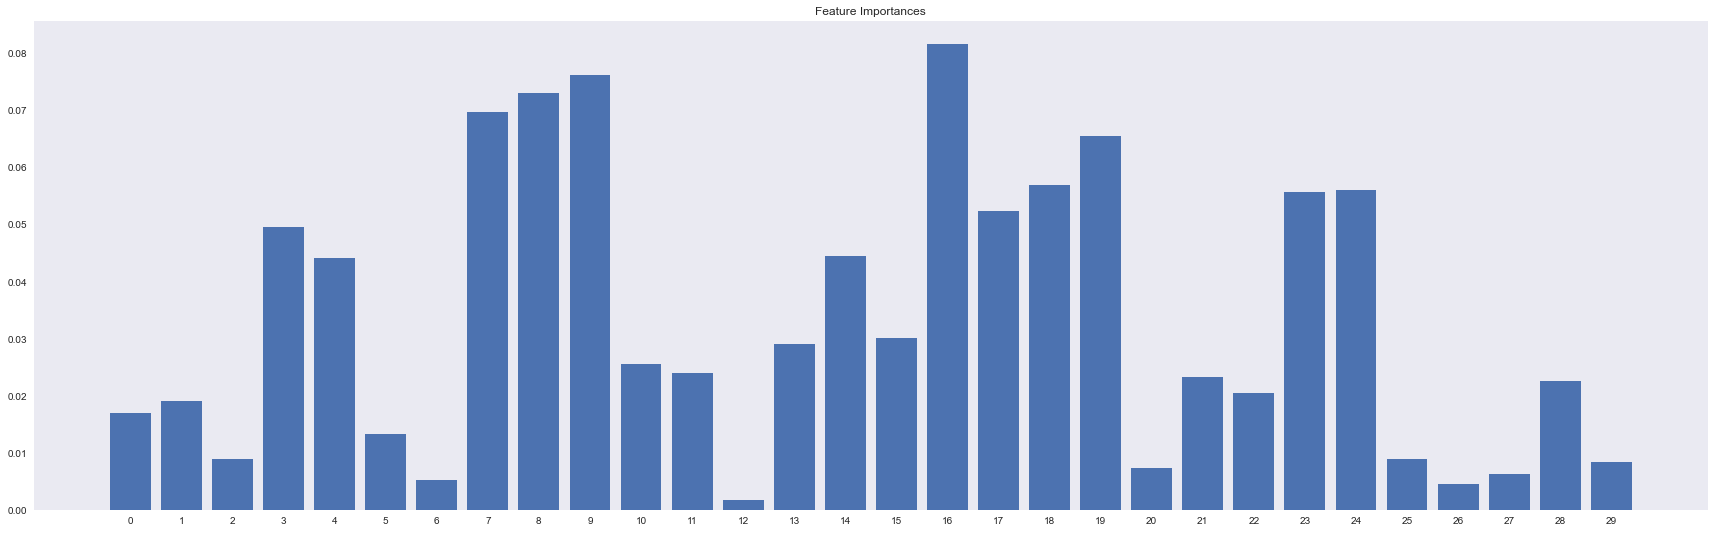

In [42]:
#feature importance usando random forest ed assegnando la media o mediana alle feature con valori NaN
def feature_importance_random_forest(df):
    X_train = df.copy()
    y_train = X_train['logerror'].values
    X_train = X_train.drop(['parcelid', 'logerror'],axis=1)
    
    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train,y_train)

    fig, ax = plt.subplots(figsize=(30,9))
    ax.bar(range(0,X_train.shape[1]), rf.feature_importances_)
    ax.set_title("Feature Importances")
    ax.set_xticks(range(X_train.shape[1]))
    ax.grid();
    
    i=0;
    for col in X_train.columns :
        print('Column '+str(i)+' :'+X_train[col].name);
        i+=1;
    
feature_importance_random_forest(df_train)

Ora che abbiamo anche una visione generale dell'importanza di ogni feature, possiamo andare a rimuovere altre feature che risultano poco importanti, e altre invece le andiamo a sostiutire 

### Divisione in Train, Validation e Test

Ora che abbiamo sistemato un pò i dati possiamo andare a fare la suddivisione in train, validation e test, per farlo utilizzeremo il K-fold

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import absolute

#mettiamo la featrue logerror come y e facciamo il drop da X
y = df_train["logerror"].values
x = df_train.copy()
x = (x.drop(columns=["logerror"]))

#split in train e test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#standardizzazione dei dati
feature_scaler = StandardScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

kf = KFold(n_splits=10, random_state=None, shuffle=True)
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_absolute_error',cv=kf, n_jobs=-1)

print(f"Linear Regression model : {mean(absolute(scores))}")

Linear Regression model : 0.06904577137096737


In [44]:
#mettiamo la featrue logerror come y e facciamo il drop da X
y = df_train["logerror"].values
x = df_train.copy()
x = (x.drop(columns=["logerror"]))


kf = KFold(n_splits=5, random_state=None, shuffle=True)
for_reg = RandomForestRegressor(max_depth=5, random_state=0)
scores = cross_val_score(for_reg, x, y, scoring='neg_mean_absolute_error',cv=kf, n_jobs=-1)

print(f"Random Forest Regressor : {mean(absolute(scores))}")

Random Forest Regressor : 0.06831017597975787


<AxesSubplot:>

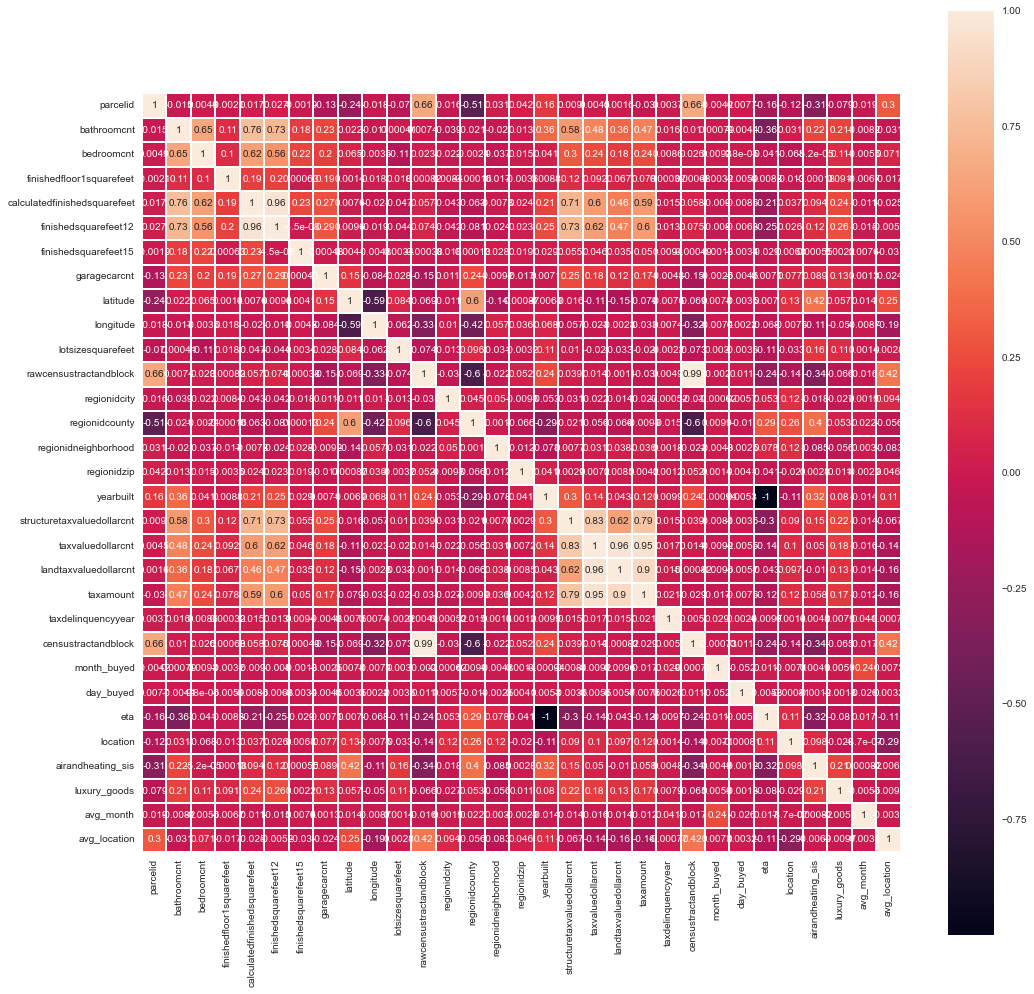

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#mettiamo la featrue logerror come y e facciamo il drop da X
y = df_train.logerror
x = df_train.copy()
x = x.drop(columns=["logerror"])

#facciamo la divisiione da dare al k-fold
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

corr = x_train_80.corr()
plt.figure(figsize=(17,17))
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

<Figure size 1224x1224 with 0 Axes>

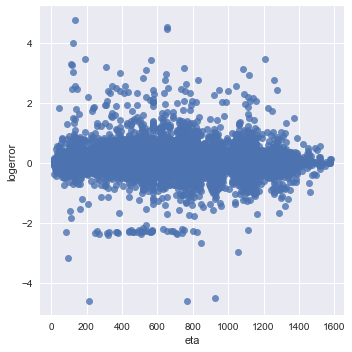

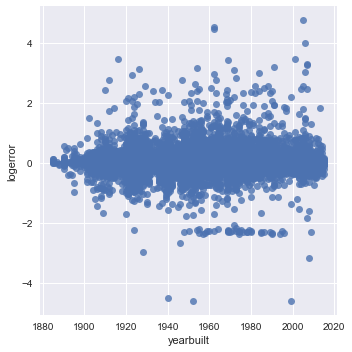

In [46]:
#Linear regression model with plot
from sklearn.linear_model import LinearRegression

x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

reg = LinearRegression().fit(x_train_80, y_train_80)
y_pred = reg.predict(x_test)

plt.figure(figsize=(17,17))
sns.lmplot(x="eta", y="logerror", data=df_train);
sns.lmplot(x="yearbuilt", y="logerror", data=df_train);
# alcune case possono avere dei valori al di fuori del comune perchè magari sono state vendute tanti anni fa ad un prezzo molto più alto di quello che sarebbe attualmente, e sono considerabili 
# outliers a tutti gli effetti

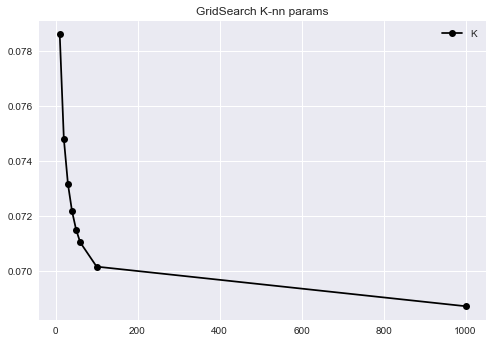

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# standardizzazione dei dati
feature_scaler = StandardScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

params = {'n_neighbors':[10,20,30,40,50,60,1001000]},

kf = KFold(n_splits=5, random_state=None, shuffle=True)

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, scoring='neg_mean_absolute_error', cv=kf).fit(x_train, y_train)

test_scores = absolute(model.cv_results_['mean_test_score'])

plt.plot(params['n_neighbors'], test_scores,'-ok', label='mean absolute error')
plt.grid(True)
plt.legend('Knn-params')
plt.title('GridSearch K-nn params')
plt.show()

In [48]:
knn = neighbors.KNeighborsRegressor(9).fit(x_train,y_train)
res = knn.predict(x_test)

In [49]:
model.cv_results_

{'mean_fit_time': array([0.01898413, 0.0183877 , 0.01859159, 0.01958351, 0.02458324,
        0.01918402, 0.01680532, 0.01798501]),
 'std_fit_time': array([0.00363393, 0.00149496, 0.00319573, 0.00272971, 0.00664728,
        0.00306115, 0.00233297, 0.00357884]),
 'mean_score_time': array([18.25158167, 18.29426756, 18.55590434, 17.40290103, 19.38018985,
        18.34655299, 16.80931492, 17.12190981]),
 'std_score_time': array([0.62870467, 0.6311972 , 0.39927407, 0.45249358, 1.4398618 ,
        1.60676522, 0.48408406, 0.44228744]),
 'param_n_neighbors': masked_array(data=[10, 20, 30, 40, 50, 60, 100, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10},
  {'n_neighbors': 20},
  {'n_neighbors': 30},
  {'n_neighbors': 40},
  {'n_neighbors': 50},
  {'n_neighbors': 60},
  {'n_neighbors': 100},
  {'n_neighbors': 1000}],
 'split0_test_score': array([-0.07633349, -0.07208924, -0.0703

In [57]:
y = df_train["logerror"].values
x = df_train.copy()
x = (x.drop(columns=["logerror"]))


kf = KFold(n_splits=5, random_state=None, shuffle=True)
knn = neighbors.KNeighborsRegressor()
scores = cross_val_score(knn, x, y, scoring='neg_mean_absolute_error',cv=kf, n_jobs=-1)

print(f"Random Forest Regressor : {scores}")

Random Forest Regressor : [-0.08575342 -0.0842603  -0.08595765 -0.08467065 -0.08627254]


Vediamo gli le accuracy

In [102]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)

model_params_copy = {
    'regression':{
        'model': reg,
        'params': {
        }
    },     
    'knn': {
        'model': knn,
        'params': {
            'n_neighbors': range(10,100,10)  
        }
    },
    'random_forest':{
        'model': for_reg,
        'params': {
            'n_estimators':  [200,500],
        }
    }
}

model_params = {
    'random_forest':{
        'model': for_reg,
        'params': {
            'n_estimators': [1,10,100],
        }
    }
}

y = df_train.logerror
x = df_train.copy()
x = x.drop(columns=["logerror"])

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=kf, return_train_score=False, scoring='neg_mean_squared_error')
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.mean_test_score,
        'mean_squared_error': absolute(clf.cv_results_['mean_test_score'].mean()),
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df



In [56]:
lin_score = -scores

print(f"Random Forest Regressor : {np.mean(lin_score)*100}")

Random Forest Regressor : 6.868411850804216


come prima cosa importante dividiamo in train e test utilizzando il k-fold cross validation, così da assicurarci di avere una divisione del df in train e test maggiormente bilanciata

In [ ]:
def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                              l_min=2, l_max=50, l_step=1):

    accuracies = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

        accuracies += [ [max_leaves, train_acc, valid_acc, test_acc] ]

    accuracies = np.array(accuracies)

    fig, ax = plt.subplots()
    ax.plot(accuracies[:,0], accuracies[:,1], "x:", label="Train")
    ax.plot(accuracies[:,0], accuracies[:,2], "o-", label="Valid")
    ax.plot(accuracies[:,0], accuracies[:,3], "s-", label="Test")
    ax.legend()
    ax.grid()
    
    return accuracies

accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test)